1. Import Libraries and Load Data

In [3]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score

In [12]:
# Load dataset
df = pd.read_csv('C:/Documents/Files/Churn_Modelling.csv')

2. Understand Data Structure

In [13]:
# First 5 rows
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [14]:
# Dataset shape
df.shape

(10000, 14)

In [15]:
# Column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              9700 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [16]:
# Summary statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,9700.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.895155,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.471956,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


3. Handle Missing Values

In [17]:
# check the missing values
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender              54
Age                300
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [18]:
# Drop irrelevant columns (RowNumber, CustomerId, Surname)
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [19]:
# checking the dataset
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0


4. Data Types and Distributions

In [20]:
# Categorical variables
print(df['Geography'].value_counts())
print(df['Gender'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5428
Female    4518
Name: count, dtype: int64


5. Detect Outliers

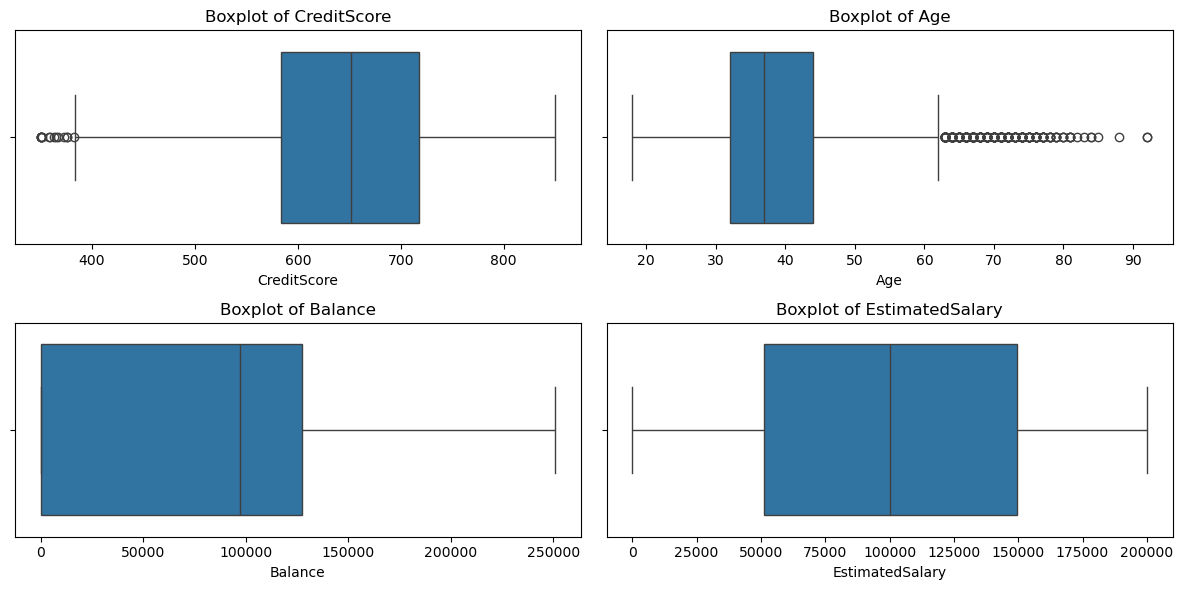

In [21]:
# Boxplots for numerical features
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [22]:
# Calculate IQR for Age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Age'] < Q1 - 1.5*IQR) | (df['Age'] > Q3 + 1.5*IQR)]
print(f"Age Outliers: {len(outliers)} rows")

Age Outliers: 346 rows


In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


6. Visualize Key Relationships

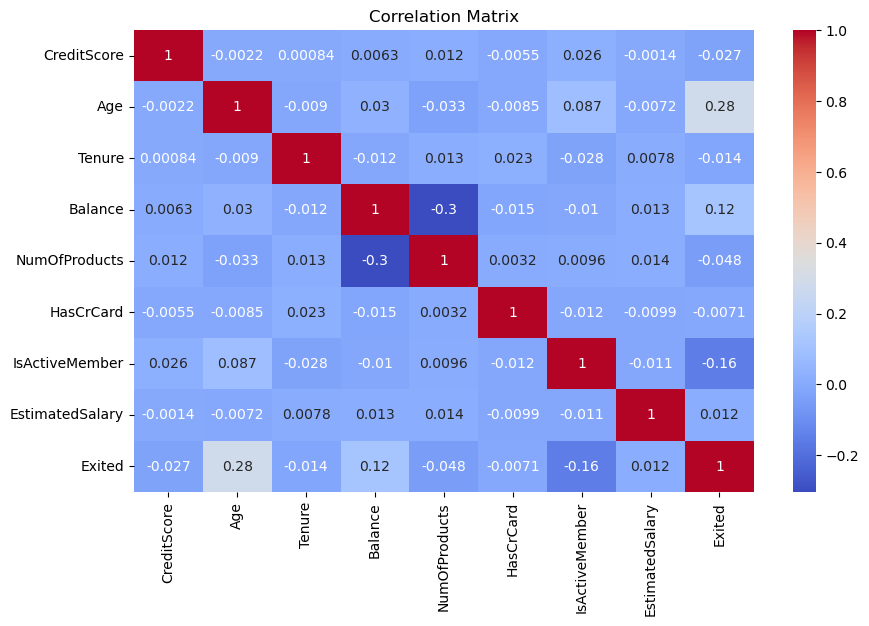

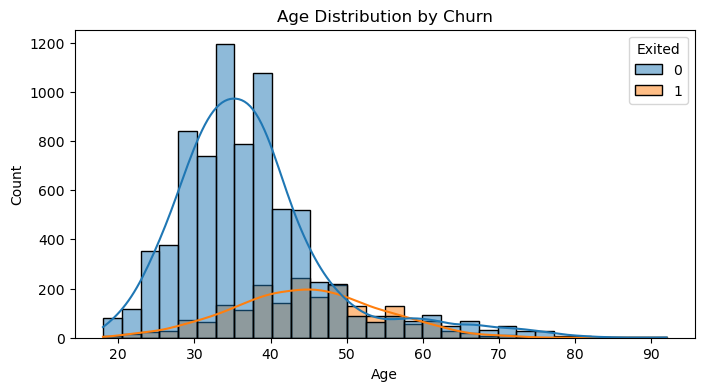

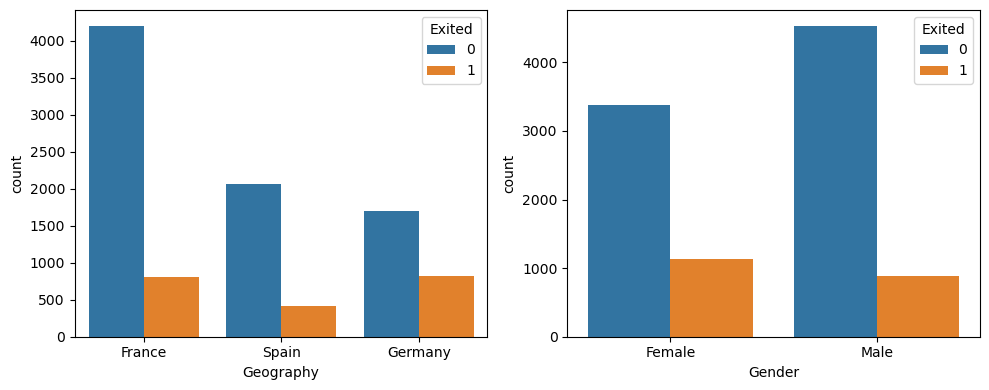

In [24]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Age vs. Churn
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, bins=30)
plt.title('Age Distribution by Churn')
plt.show()

# Geography and Gender impact on Churn
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Geography', hue='Exited', data=df)
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='Exited', data=df)
plt.tight_layout()
plt.show()

7. Summary Statistics

In [25]:
# Group by churn status
churn_summary = df.groupby('Exited').mean(numeric_only=True)
churn_summary

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.392936,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.785895,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [26]:
# checking unique values for categorical column
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

for i in df.columns:
    if i not in numerical_features:
        print(i,df[i].unique())
        print('-'*50)

Geography ['France' 'Spain' 'Germany']
--------------------------------------------------
Gender ['Female' 'Male' nan]
--------------------------------------------------
Tenure [ 2  1  8  7  4  6  3 10  5  9  0]
--------------------------------------------------
NumOfProducts [1 3 2 4]
--------------------------------------------------
HasCrCard [1 0]
--------------------------------------------------
IsActiveMember [1 0]
--------------------------------------------------
Exited [1 0]
--------------------------------------------------


8. hypothesis testing

In [27]:
# Categorical features to test
categorical_features = ['HasCrCard', 'IsActiveMember','Gender','Geography','NumOfProducts']

for feature in categorical_features:
    # Create contingency table
    contingency_table = pd.crosstab(df[feature], df['Exited'])
    
    # Perform chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Print results
    print(f"\n{feature} vs. Exited:")
    print(f"Chi-square Statistic: {chi2_stat:.2f}")
    print(f"p-value: {p_value:.4f}")
    print("-------------------------")


HasCrCard vs. Exited:
Chi-square Statistic: 0.47
p-value: 0.4924
-------------------------

IsActiveMember vs. Exited:
Chi-square Statistic: 242.99
p-value: 0.0000
-------------------------

Gender vs. Exited:
Chi-square Statistic: 115.24
p-value: 0.0000
-------------------------

Geography vs. Exited:
Chi-square Statistic: 301.26
p-value: 0.0000
-------------------------

NumOfProducts vs. Exited:
Chi-square Statistic: 1503.63
p-value: 0.0000
-------------------------


In [28]:
# List of numerical columns to test
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in numerical_cols:
    print(f"\n--- Analysis for {col} ---")
    
    # Split data into two groups: retained vs. churned
    retained = df[df['Exited'] == 0][col]
    churned = df[df['Exited'] == 1][col]
    
    # Check normality using Shapiro-Wilk test
    _, p_retained = stats.shapiro(retained)
    _, p_churned = stats.shapiro(churned)
    
    # Decide test based on normality
    if p_retained > 0.05 and p_churned > 0.05:
        # Use t-test (normal distribution)
        t_stat, p_val = stats.ttest_ind(retained, churned)
        print(f"T-test: t = {t_stat:.2f}, p = {p_val:.4f}")
        
        # Calculate Cohen's d (effect size)
        pooled_std = np.sqrt((retained.var() + churned.var()) / 2)
        cohen_d = (retained.mean() - churned.mean()) / pooled_std
        print(f"Cohen's d = {cohen_d:.2f}")
    else:
        # Use Mann-Whitney U test (non-normal)
        u_stat, p_val = stats.mannwhitneyu(retained, churned)
        print(f"Mann-Whitney U: U = {u_stat:.2f}, p = {p_val:.4f}")
        
        # Calculate Rank-Biserial Correlation (effect size)
        n_retained = len(retained)
        n_churned = len(churned)
        r_biserial = 1 - (2 * u_stat) / (n_retained * n_churned)
        print(f"Rank-Biserial r = {r_biserial:.2f}")
    
    # Plot distributions
    # plt.figure(figsize=(8, 4))
    # sns.histplot(data=df, x=col, hue='Exited', kde=True, bins=30, palette=['#1f77b4', '#ff7f0e'])
    # plt.title(f'{col} Distribution by Churn Status')
    # plt.show()


--- Analysis for CreditScore ---
Mann-Whitney U: U = 8381083.00, p = 0.0199
Rank-Biserial r = -0.03

--- Analysis for Age ---
Mann-Whitney U: U = nan, p = nan
Rank-Biserial r = nan

--- Analysis for Tenure ---
Mann-Whitney U: U = 8272055.50, p = 0.1622
Rank-Biserial r = -0.02

--- Analysis for Balance ---
Mann-Whitney U: U = 6849444.50, p = 0.0000
Rank-Biserial r = 0.16

--- Analysis for NumOfProducts ---
Mann-Whitney U: U = 9390005.50, p = 0.0000
Rank-Biserial r = -0.16

--- Analysis for EstimatedSalary ---
Mann-Whitney U: U = 7969863.00, p = 0.2271
Rank-Biserial r = 0.02


C:\Users\Aasim\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7963.
  res = hypotest_fun_out(*samples, **kwds)


In [29]:
# droping column after hypothesis testing
df = df.drop(['Tenure','EstimatedSalary','HasCrCard'], axis=1)

In [30]:
df

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,France,Female,42.0,0.00,1,1,1
1,608,Spain,Female,41.0,83807.86,1,1,0
2,502,France,Female,42.0,159660.80,3,0,1
3,699,France,Female,39.0,0.00,2,0,0
4,850,Spain,Female,43.0,125510.82,1,1,0
...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.0,0.00,2,0,0
9996,516,France,Male,35.0,57369.61,1,1,0
9997,709,France,Female,36.0,0.00,1,1,1
9998,772,Germany,Male,42.0,75075.31,2,0,1


9. splitting the x_train and y_train

In [31]:
x = df.iloc[:,:-1]

In [32]:
x

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42.0,0.00,1,1
1,608,Spain,Female,41.0,83807.86,1,1
2,502,France,Female,42.0,159660.80,3,0
3,699,France,Female,39.0,0.00,2,0
4,850,Spain,Female,43.0,125510.82,1,1
...,...,...,...,...,...,...,...
9995,771,France,Male,39.0,0.00,2,0
9996,516,France,Male,35.0,57369.61,1,1
9997,709,France,Female,36.0,0.00,1,1
9998,772,Germany,Male,42.0,75075.31,2,0


In [33]:
y = df.iloc[:,-1]

In [34]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

10. label encoding

In [35]:
# encoding categorical data
encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(df['Exited']))
for col in x.select_dtypes(include='object').columns:
    x[col] = encoder.fit_transform(x[col])

In [36]:
x

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,0,0,42.0,0.00,1,1
1,608,2,0,41.0,83807.86,1,1
2,502,0,0,42.0,159660.80,3,0
3,699,0,0,39.0,0.00,2,0
4,850,2,0,43.0,125510.82,1,1
...,...,...,...,...,...,...,...
9995,771,0,1,39.0,0.00,2,0
9996,516,0,1,35.0,57369.61,1,1
9997,709,0,0,36.0,0.00,1,1
9998,772,1,1,42.0,75075.31,2,0


In [37]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Length: 10000, dtype: int64

11. Training set and Test set

In [38]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [39]:
len(df)

10000

In [40]:
len(x_train)

8000

In [41]:
len(x_test)

2000

12. balancing the dataset

In [42]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [43]:
# Sample 50% of the data, keeping the same proportion of Exited
sampled_df = df.groupby('Exited', group_keys=False).apply(lambda x: x.sample(frac=0.5))

# Check the counts after sampling
print(sampled_df['Exited'].value_counts())

Exited
0    3982
1    1018
Name: count, dtype: int64


C:\Users\Aasim\AppData\Local\Temp\ipykernel_21684\1253721285.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('Exited', group_keys=False).apply(lambda x: x.sample(frac=0.5))


In [44]:
# # using the smote process to balance the dataset

# smote = SMOTE(sampling_strategy='minority')
# x_smote, y_smote = smote.fit_resample(x_train, y_train)

# y_smote.value_counts()

13. feature scaling

In [50]:
# Training features and target
X = sampled_df.drop('Exited', axis=1)
y = sampled_df['Exited']

X = pd.get_dummies(X, drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [51]:
X_test = pd.get_dummies(x_test, drop_first=True)

# Make sure train and test have the same columns
X_test = X_test.reindex(columns=X.columns, fill_value=0)

X_test_scaled = scaler.transform(X_test)

In [54]:
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [56]:
X.shape

(5000, 8)

In [59]:
y.shape

(5000,)

In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=50, batch_size=32, 
                    validation_split=0.2, verbose=1)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9212 - loss: 620.7529 - val_accuracy: 0.0000e+00 - val_loss: 0.9523
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.4518 - val_accuracy: 0.0000e+00 - val_loss: 1.2215
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - loss: 0.3313 - val_accuracy: 0.0000e+00 - val_loss: 1.4906
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9934 - loss: 0.2486 - val_accuracy: 0.0000e+00 - val_loss: 1.7571
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9948 - loss: 0.1890 - val_accuracy: 0.0000e+00 - val_loss: 2.0168
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9945 - loss: 0.1508 - val_accuracy: 0.0000e+00 - val_loss: 2.2693
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9954 - loss: 0.1170 - val_accuracy: 0.0000e+00 - val_loss: 2.5114
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9943 - l

In [61]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 [[1595    0]
 [ 405    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



C:\Users\Aasim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aasim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aasim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [62]:
score3 = accuracy_score(y_test,y_pred)
print(score3*100)

79.75
